In [1]:
from PIL import Image

In [12]:
rectangle = Image.open('sample-photo.png')
px_rectangle = rectangle.load()

In [9]:
circle = Image.new('RGBA', (512, 512), (255, 255, 255, 255))
px_circle = circle.load()

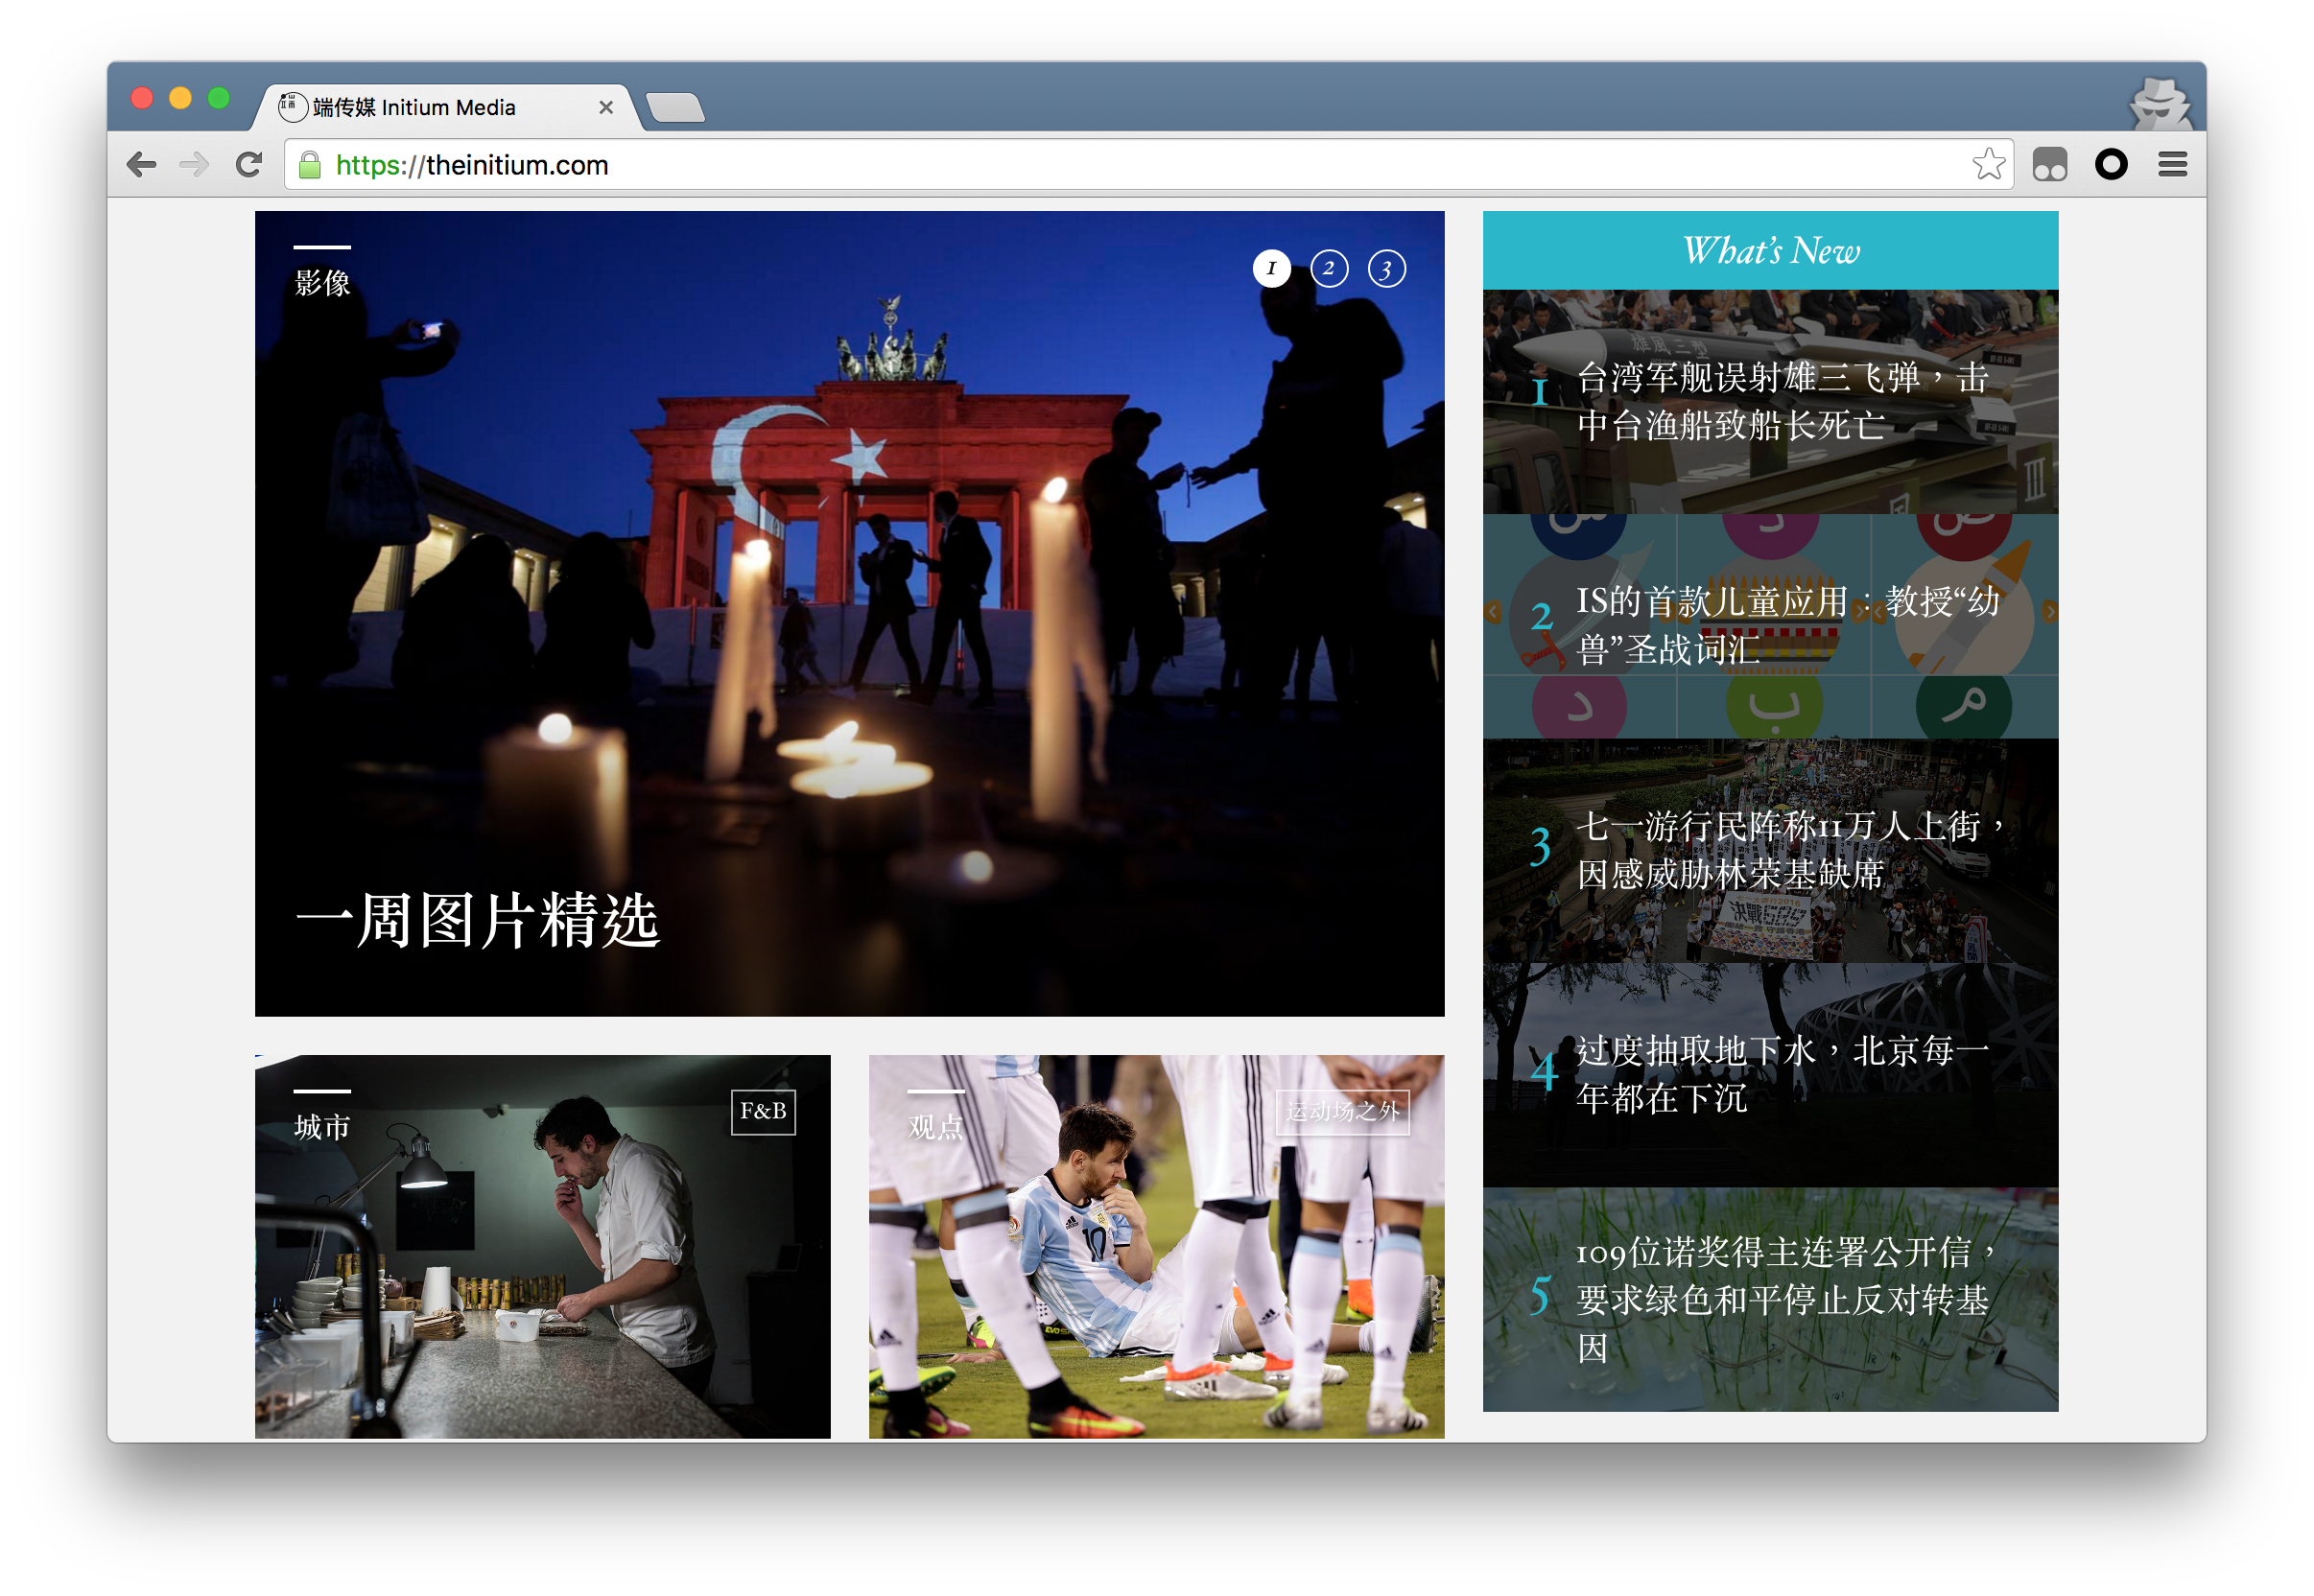

In [10]:
rectangle

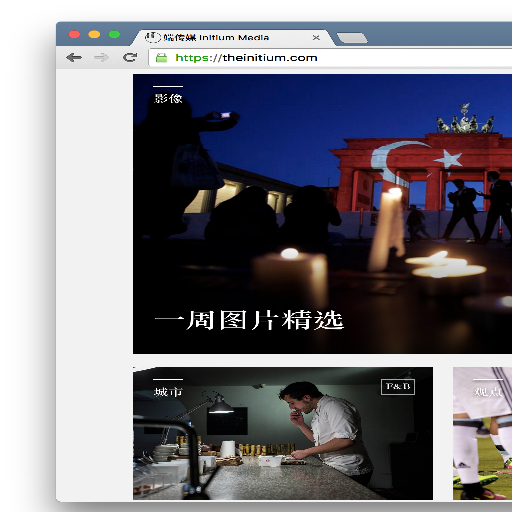

In [17]:
# Test a casual transformation
for i in range(0, 512):
    for j in range(0, 512):
        px_circle[i, j] = px_rectangle[i * 2, j * 3]
circle

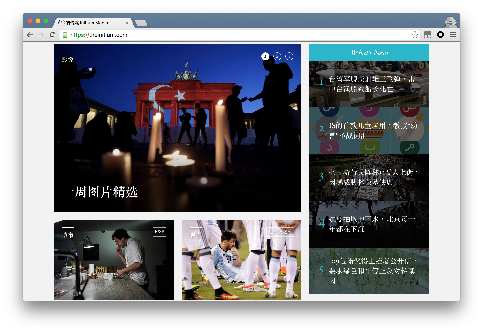

In [64]:
rectangle = Image.open('sample-photo.png')
rectangle = rectangle.resize((int(rectangle.size[0]/5), int(rectangle.size[1]/5)))
px_rectangle = rectangle.load()
rectangle

In [60]:
import numpy as np
w, h = rectangle.size
a = w / 2
b = h / 2
r = int(np.sqrt(a * a + b * b))
r

292

In [93]:
def arctan_2pi(x, y):
    # fix theta to [0, 2*pi] according to the quadrant
    theta = np.arctan(y/x)
    if (x > 0) and (y > 0):
        return theta
    if (x < 0) and (y > 0):
        return theta + np.pi
    if (x < 0) and (y < 0):
        return theta + np.pi
    if (x > 0) and (y < 0):
        return theta + 2 * np.pi

print(arctan_2pi(1, 1) / np.pi * 180)
print(arctan_2pi(-1, 1) / np.pi * 180)
print(arctan_2pi(-1, -1) / np.pi * 180)
print(arctan_2pi(1, -1) / np.pi * 180)

45.0
135.0
225.0
315.0


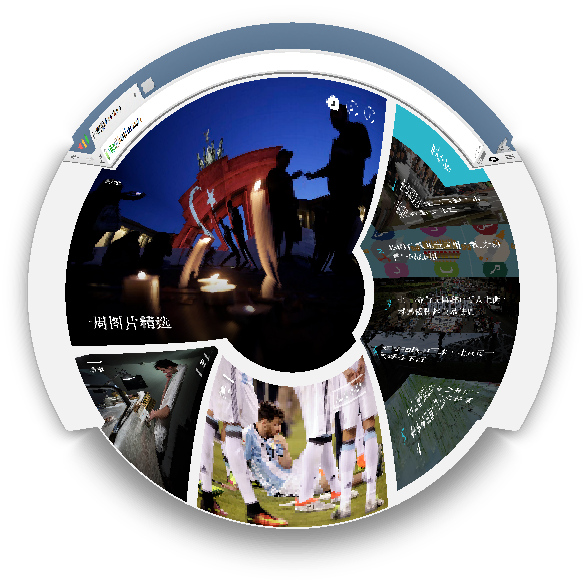

In [110]:
def coord2index(x, y, origin):
    return int(np.round(x + origin[0])), int(np.round(origin[1] - y))

def index2coord(i, j, origin):
    return i - origin[0], origin[1] - j

circle = Image.new('RGBA', (2 * r, 2 * r), (255, 255, 255, 255))
px_circle = circle.load()

for ii in range(1, 2 * r):
    for jj in range(1, 2 * r):
        xpp, ypp = index2coord(ii, jj, (r, r))
        if (xpp**2 + ypp**2 < r**2):
            if xpp == 0:
                xp = 0
                yp = ypp * b / r
            elif ypp == 0:
                yp = 0
                xp = xpp * a /r
            else:
                theta = arctan_2pi(xpp, ypp)
                if (np.abs(ypp / xpp) > b / a):
                    l_op = b / r * xpp * (1/(np.cos(theta)*np.sin(theta)))
                    xp = l_op * np.cos(theta)
                    yp = l_op * np.sin(theta)
                    if ypp < 0:
                        xp = - xp
                        yp = - yp
                else:
                    l_op = a / r * ypp * (1/(np.cos(theta)*np.sin(theta)))
                    xp = l_op * np.cos(theta)
                    yp = l_op * np.sin(theta)
                    if xpp < 0:
                        xp = - xp
                        yp = - yp
            i, j = coord2index(xp, yp, (a, b))
            i = min(i, w - 1)
            j = min(j, h - 1)
            p_data = px_rectangle[i, j]
            px_circle[ii, jj] = p_data

circle

In [45]:
#rectangle.size